In [36]:
from autograd import numpy as np
from autograd import hessian, jacobian
import scipy.optimize as opt
from matplotlib import pyplot as plt
import time

# Problem 1 - Newton Method

In [487]:
def newton_method(x_0,f,df,d2f,tol,maxiter):
    for i in range(maxiter):
        x_1 = x_0 - np.matmul( np.linalg.inv(d2f(x_0)), df(x_0).T)
        if np.linalg.norm(x_1 - x_0) < tol:
            break
        x_0 = x_1
    return x_1

In [488]:
tol = 1e-10
maxiter = 10**5
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess
x_01 = np.array([-2,2])
x_02 = np.array([10, -10])

In [489]:
print(newton_method(x_01,f,df,d2f,tol,maxiter))

[1. 1.]


In [490]:
print(newton_method(x_02,f,df,d2f,tol,maxiter))

[1. 1.]


Inbuilt function

In [491]:
minx1 = opt.fmin_bfgs(f=f,x0=np.array([-2,2]),fprime=df,maxiter=10**5,gtol=10**-10)
print("=========\n", minx1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 45
         Gradient evaluations: 45
 [1. 1.]


In [105]:
minx2 = opt.fmin_bfgs(f=f,x0=np.array([10,-10]),fprime=df,maxiter=10**5,gtol=10**-10)
print("=========\n",minx2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 83
         Function evaluations: 109
         Gradient evaluations: 109
 [1. 1.]


# Problem 2 - BFGS 

In [652]:
def bfgs(x_0, f, df, tol, maxiter):
    A_ = np.identity(2)
    for i in range(maxiter):
        x_1 = x_0 - A_ @ df(x_0)
        
        if np.linalg.norm(x_1[None] - x_0[None]) < tol:
            break
        
        s = (x_1 - x_0).T
        y = (df(x_1) - df(x_0))[None].T

        A_ = (((s.T@y + y.T@A_@y) * (s@s.T))/(s.T@y)**2) - ((A_@y@s.T+(s@y.T)*A_)/(s.T@y))
        
        x_0 = x_1
    return x_1

In [653]:
f = lambda x : np.exp(x[0]-1) + np.exp(1 - x[1]) + (x[0] - x[0][1])**2
df = lambda x : np.array([np.exp(x[0][0]-1) + 2*(x[0][0]-x[0][1]), -1*np.exp(1-x[0][1]) - 2*(x[0][0]-x[0][1])])
tol = 1e-3
maxiter = 10**6
x_0=np.array([2.,3.])[None]

In [654]:
print(bfgs(x_0, f, df, tol, maxiter))

[[0.78705095 1.21213717]]


In [655]:
f = lambda x : np.exp(x[0]-1) + np.exp(1 - x[1]) + (x[0] - x[1])**2
df = lambda x : np.array([np.exp(x[0]-1) + 2*(x[0]-x[1]), -1*np.exp(1-x[1]) - 2*(x[0]-x[1])])
minx = opt.fmin_bfgs(f=f,fprime=df,x0=[2,3],gtol=10**-2,maxiter=10**3)
print("=========\n",minx)

Optimization terminated successfully.
         Current function value: 1.797394
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
 [0.79864113 1.20624613]


# Problem 3 - Comparing performance

In [568]:
f1 = lambda x : 0.26 * (x[0]**2 + x[1]**2) -0.48 * x[0] * x[1] 
df1 = lambda x : np.array([.52*x[0] - .48*x[1], .52*x[1]-.48*x[0]])
d2f1 = hessian(f1)

f2 = lambda x : np.sin(x[0] + x[1]) + (x[0] - x[1])**2 -1.5 * x[0] + 2.5 * x[1] + 1
df2 = lambda x : np.array([np.cos(x[0]+x[1])+2*(x[0]-x[1])-1.5, np.cos(x[0]+x[1])-2*(x[0]-x[1])+2.5])
d2f2 = hessian(f2)

tol = 1e-10
maxiter = 10**5
x_0 = np.array([3.,3.])

In [577]:
t0=time.time()
minx = opt.fmin_bfgs(f=f1, x0=np.array([3.,3.]),fprime=df1,maxiter=10**5,gtol=10**-10);
t1=time.time()
print("=========\nTime elasped",t1-t0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Time elasped 0.0011148452758789062


In [578]:
t0=time.time()
minx = opt.fmin_bfgs(f=f2,x0=np.array([3.,3.]),fprime=df2,maxiter=10**9,gtol=10**-19)
t1=time.time()
print("=========\nTime elasped",t1-t0)

         Current function value: 1.228370
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 8
Time elasped 0.0016181468963623047


Newton's Method

In [579]:
t0=time.time()
newton_method(x_0, f1, df1, d2f1, tol, maxiter)
t1=time.time()
print("=========\nTime elasped",t1-t0)

Time elasped 0.005695819854736328


In [580]:
t0=time.time()
newton_method(x_0, f2, df2, d2f2, tol, maxiter)
t1=time.time()
print("=========\nTime elasped",t1-t0)

Time elasped 0.01701188087463379


BFGS 

In [581]:
f1 = lambda x : 0.26 * (x[0][0]**2 + x[0][1]**2) - 0.48 * x[0][0] * x[0][1] 
df1 = lambda x : np.array([.52*x[0][0] - .48*x[0][1],
                           .52*x[0][1] - .48*x[0][0]])

f2 = lambda x : np.sin(x[0][0] + x[0][1]) + (x[0][0] - x[0][1])**2 -1.5 * x[0][0] + 2.5 * x[0][1] + 1
df2 = lambda x : np.array([np.cos(x[0][0]+x[0][1])+2*(x [0][0]-x[0][1])-1.5,
                           np.cos(x[0][0]+x[0][1])-2*(x[0][0]-x[0][1])+2.5])

tol = 1e-15
maxiter = 10**5
x_0 = np.array([3.,3.])[None]

In [582]:
t0=time.time()
bfgs(x_0, f1, df1, tol, maxiter)
t1=time.time()
print("=========\nTime elasped",t1-t0)

Time elasped 0.00528407096862793


In [584]:
t0=time.time()
bfgs(x_0, f2, df2, .4, maxiter)
t1=time.time()
print("=========\nTime elasped",t1-t0)

Time elasped 0.0021321773529052734


# Problem 4 - Gauss-Newton Method

In [37]:
np.random.seed(1)
n=10
t = np.arange(n)
y = 3*np.sin(0.5*t)+ 0.5*np.random.randn(n)

In [38]:
m = lambda x : x[0]*np.sin(x[1]*t)
r = lambda x : m(x)-y
J = lambda x : np.concatenate(((np.sin(x[1]*t))[None].T,(x[0]*t*np.cos(x[1]*t))[None].T),axis=1)
tol = 1e-10
maxiter = 1000
x_0 = np.array([5, 3])

In [39]:
minx = opt.leastsq(func=r, x0=x_0, Dfun=J,xtol=tol,maxfev=maxiter)
print(minx[0])

[-68.08122504   3.13984697]


In [40]:
def gauss_newton_method(x_0, r, J, tol, maxiter):
    conv = False
    for i in range(maxiter):
        x_1 = x_0 - np.linalg.inv(J(x_0).T @ J(x_0)) @ J(x_0).T @ r(x_0)
        #print(i)
        if np.linalg.norm(x_1 - x_0) < tol:
            conv = True
            break
        x_0=x_1
        #print(x_1)
    return x_1,i+1,conv

In [41]:
print(gauss_newton_method(x_0, r, J, tol, maxiter))
x,iter,conv=gauss_newton_method(x_0, r, J, tol, maxiter)

(array([ -2.7967951 , -13.06878025]), 23, True)


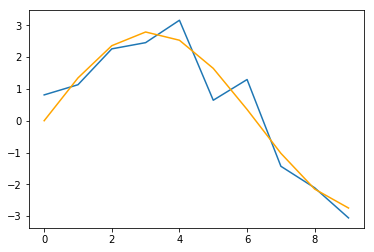

In [42]:
plt.plot(t,y)
plt.plot(t,m(x),color="orange")
#plt.plot(t,m(minx[0]),color="yellow")

In [31]:
abs(r([ -2.7967951 , -13.06878025])).sum()

4.793652244287216

# Problem 5 - Non Linear Least Square

In [32]:
pop_sample=np.array([[0., 1., 2., 3., 4., 5., 6., 7.],
                     [ 3.929, 5.308, 7.24, 9.638, 12.866, 17.069, 23.192, 31.443]])

In [33]:
t=pop_sample[0]
y=pop_sample[1]

psi = lambda x : x[0] * np.exp( x[1] * (t + x[2]))
x_0 =np.array([150., .4, 2.5])
r = lambda x : psi(x)-y
J = lambda x : np.concatenate(((np.exp( x[1] * (t + x[2])))[None].T,
                         (x[0]*np.multiply((t+x[2]),np.exp(x[1]*(t+x[2]))))[None].T,
                         (x[0]*x[1]*np.exp(x[1]*(t+x[2])))[None].T),axis=1)
tol = 1e-10
maxiter = 1000

In [34]:
minx = opt.leastsq(func=r, x0=x_0, Dfun=J,xtol=tol,maxfev=maxiter)
print(minx[0])

[138.53919862   0.29686346 -12.00846177]


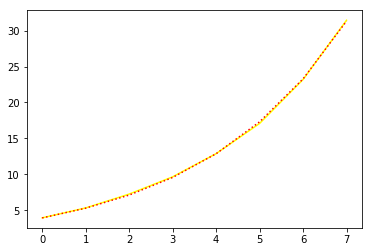

In [35]:
plt.plot(t,y,color="yellow") # original data
plt.plot(t,psi(minx[0]),color='red',linestyle=':') #model line